## FEC Campaign Finance

### Contributions from committees to candidates & independent expenditures

resolve color/ls dupe issue

In [1]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import warnings
warnings.filterwarnings('ignore')

from datetime import datetime as dt
from matplotlib import font_manager as fm, rcParams
import matplotlib.dates as mdates
from matplotlib.lines import Line2D
from matplotlib.offsetbox import (
    AnnotationBbox,
    OffsetImage, 
)

%matplotlib inline

In [2]:
cand = pd.read_csv('data/04a_cand_cleaned.csv')
cand_dict = dict(zip(cand['cand_id'], cand['cand_name']))
cand.head(2)

,cand_id,cand_name,cand_ici,cand_pty_affiliation,ttl_receipts,trans_from_auth,ttl_disb,trans_to_auth,coh_bop,coh_cop,...,(for) count,(for) sum,(against) count,(against) sum,(coord pty exp) count,(coord pty exp) sum,(in-kind) count,(in-kind) sum,(nonaffiliated) count,(nonaffiliated) sum
0,H0AL02087,"ROBY, MARTHA",I,Republican,2573681.12,85734.19,2277448.83,0.0,45450.72,341683.01,...,3.0,353829.0,3.0,933.0,0.0,0.0,0.0,0.0,4.0,1646955.0
1,H0AL05163,"BROOKS, MO",I,Republican,1527246.16,0.00,2006001.97,0.0,1170937.70,692181.51,...,3.0,4703.0,2.0,861.0,0.0,0.0,0.0,0.0,3.0,250700.0


In [3]:
cm = pd.read_csv('data/03a_committees.csv')
cm_dict = dict(zip(cm['cmte_id'], cm['cmte_nm']))
cm.head(2)

,cmte_id,cmte_nm,tres_nm,cmte_st1,cmte_st2,cmte_city,cmte_st,cmte_zip,cmte_dsgn,cmte_tp,cmte_pty_affiliation,cmte_filing_freq,org_tp,connected_org_nm,cand_id,orig_tres_nm,orig_cmte_st1,address,pcc
0,C00000018,IRONWORKERS LOCAL UNION NO. 25 POLITICAL EDUCA...,STEVEN GULICK,43335 W 10 MILE,P O BOX 965,NOVI,MI,48050.0,Unauthorized,cmte_PACqual,UNK,T,NaN,IRON WORKERS; INT'L ASS'N OF BRIDGE...,H8TX22313,STEVEN N GULICK,43335 W 10 MILE,"43335 W 10 MILE, NOVI, MI 48050",False
1,C00000059,HALLMARK CARDS PAC,SARAH MOE,2501 MCGEE,MD #500,KANSAS CITY,MO,64108.0,Unauthorized,cmte_PACqual,UNK,M,org_Corporation,NaN,NaN,SARAH MOE,2501 MCGEE,"2501 MCGEE, KANSAS CITY, MO 64108",False


In [4]:
pas = pd.read_csv('data/04a_pas_cleaned.csv')

pas.head()

,cmte_id,cmte_name,entity_tp,name,other_id,other_name,transaction_amt,cand_id,cand_name,transaction_dt,...,rpt_tp,image_num,transaction_tp,city,state,zip_code,employer,file_num,memo_cd,cmte_tres
0,C00390633,SCHOOLSFIRST FEDERAL CREDIT UNION EMPLOYEES FE...,enttp_Candidate Committee,comm2__PETE AGUILAR FOR CONGRESS (nonaffiliated),C00510461,PETE AGUILAR FOR CONGRESS,2500,H2CA31125,"AGUILAR, PETE",2017-12-18,...,Year end,201801249090614097,Contribution made to nonaffiliated committee,SAN BERNARDINO,CA,92423,NaN,1199694,NaN,CARY DAVIDSON
1,C00392464,UNIVERSAL MUSIC GROUP PAC,enttp_Candidate Committee,comm2__RATCLIFFE FOR CONGRESS (nonaffiliated),C00554113,RATCLIFFE FOR CONGRESS,500,H4TX04153,"RATCLIFFE, JOHN L",2017-12-12,...,Year end,201801249090614162,Contribution made to nonaffiliated committee,ROCKWALL,TX,75032,NaN,1199696,NaN,CARY DAVIDSON
2,C00392464,UNIVERSAL MUSIC GROUP PAC,enttp_Candidate Committee,comm2__TED DEUTCH FOR CONGRESS COMMITTEE (nona...,C00469163,TED DEUTCH FOR CONGRESS COMMITTEE,2000,H0FL19080,"DEUTCH, THEODORE ELIOT",2017-12-13,...,Year end,201801249090614162,Contribution made to nonaffiliated committee,WASHINGTON,DC,20036,NaN,1199696,NaN,CARY DAVIDSON
3,C00368993,WINNING STRATEGIES WASHINGTON PAC,enttp_Candidate Committee,comm2__DONALD M PAYNE JR FOR CONGRESS (nonaffi...,C00519355,DONALD M PAYNE JR FOR CONGRESS,1300,H2NJ10154,"PAYNE, DONALD M., JR.",2017-12-12,...,Year end,201801249090614336,Contribution made to nonaffiliated committee,NEWARK,NJ,07114,NaN,1199704,NaN,MICHAEL MEROLA
4,C00368993,WINNING STRATEGIES WASHINGTON PAC,enttp_Candidate Committee,comm2__FRIENDS OF DON BEYER (nonaffiliated),C00555888,FRIENDS OF DON BEYER,500,H4VA08224,"BEYER, DONALD STERNOFF HONORABLE JR.",2017-10-31,...,Year end,201801249090614337,Contribution made to nonaffiliated committee,ALEXANDRIA,VA,22314,NaN,1199704,NaN,MICHAEL MEROLA


In [5]:
print(pas.loc[pas['cmte_name'].isnull(), 'transaction_amt'].sum())
pas.loc[pas['cmte_name'].isnull(), 'cmte_name'] = '(cmte_name missing)'

0


Contribution made to nonaffiliated committee
count: 239585
unique: 3919
median: 1300.0
mean: 1861.4549992695704
std dev: 1849.8518413767222
NATIONAL AIR TRAFFIC CONTROLLERS ASSOCIATION PAC                                                         2214
LOCKHEED MARTIN CORP EMPLOYEES' PAC                                                                      1934
(cmte_name missing)                                                                                      1704
THE BOEING COMPANY PAC                                                                                   1613
NATIONAL ASSOCIATION OF REALTORS PAC                                                                     1566
UNITED PARCEL SERVICE INC. PAC                                                                           1449
IT STARTS TODAY                                                                                          1385
AT&T INC. FEDERAL PAC (AT&T FEDERAL PAC)                                                  

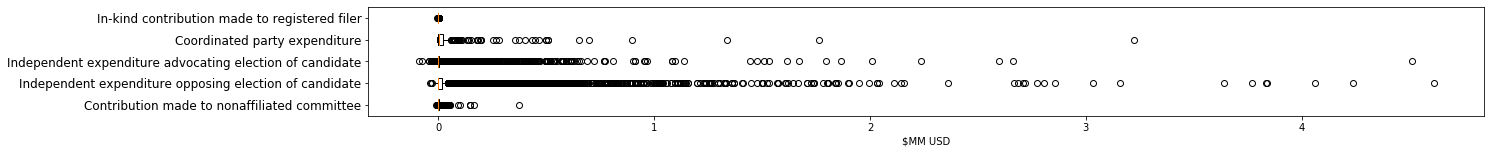

In [6]:
data = []
labels = list(set(pas.loc[pd.notnull(pas['cand_id']), 'transaction_tp']))
for which in labels:
    lil_pas = pas[pd.notnull(pas['cand_id']) & (pas['transaction_tp'] == which)]
    data.append(lil_pas['transaction_amt']/1.0E6)
    print(which)
    print('count:', len(lil_pas))
    print('unique:', len(lil_pas['cmte_name'].value_counts()))
    print('median:', lil_pas['transaction_amt'].median())
    print('mean:', lil_pas['transaction_amt'].mean())
    print('std dev:', lil_pas['transaction_amt'].std())
    print(lil_pas['cmte_name'].value_counts()[:20])
    print('\n')

plt.figure(figsize = (20, 2))

plt.boxplot(data, vert = False)
plt.yticks(range(1, len(labels) + 1), labels, fontsize = 12)
plt.xlabel('$MM USD')

plt.show();

In [7]:
# label contributions *advocating for* candidate
pas['cmte_name'] = [f'comm3__{x}' for x in pas['cmte_name']]

In [8]:
# label coord party expenditures
pas.loc[
    pas['transaction_tp'] == 'In-kind contribution made to registered filer', 
    'name'] = \
pas.loc[
    pas['transaction_tp'] == 'In-kind contribution made to registered filer', 
    'name'].apply(lambda x: 'comm2__' + x + ' (in-kind)')

In [9]:
# create dataframe to show summary stats per committee
spent = pd.DataFrame()

spent['cmte_name'] = sorted(list(pas['cmte_name'].value_counts()[pas['cmte_name'].value_counts() > 5].index))

# one column for each candidate appearing
each = sorted(list(set(pas['cand_id'])))
for which in each:
    spent[which] = [0]*len(spent)

total = []
count = []
distinct = []
ents = []
for name in spent['cmte_name']:
    lil_pas = pas[pas['cmte_name'] == name]
    total.append(lil_pas['transaction_amt'].sum())
    count.append(len(lil_pas))
    distinct.append(len(lil_pas.drop_duplicates(['cand_id'])))
    every_each = list(lil_pas['cand_id'].values)
    for which in every_each:
        comm_cand = lil_pas.loc[lil_pas['cand_id'] == which, 'transaction_amt'].sum()
        if comm_cand > 0:
            spent.loc[spent['cmte_name'] == name, which] = comm_cand
    ents.append(list(set(lil_pas['entity_tp'])))
            
spent['total'] = total
spent['count'] = count
spent['distinct'] = distinct
spent['entity_tps'] = ents
del total, count, distinct, ents

spent.sort_values(['total'], ascending = False, inplace = True)
spent.reset_index(drop = True, inplace = True)
print(len(spent))
spent.head()

3159


,cmte_name,H0AL02087,H0AL05163,H0AL07086,H0AR01083,H0AR03055,H0AZ01259,H0CA03078,H0CA10073,H0CA10149,...,S8VT00141,S8WA00194,S8WA00319,S8WI00224,S8WV00143,S8WY00189,total,count,distinct,entity_tps
0,comm3__CONGRESSIONAL LEADERSHIP FUND,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,124708177,1211,100,[enttp_Organization (not a committee and not a...
1,comm3__SMP,0,0,0,0,0,0,0,0,0,...,0,0,0,0,8418619,0,107503012,352,20,[enttp_Organization (not a committee and not a...
2,comm3__SENATE LEADERSHIP FUND,0,0,0,0,0,0,0,0,0,...,0,0,0,0,107232,0,85791877,531,16,[enttp_Organization (not a committee and not a...
3,comm3__DCCC,0,0,158,0,0,0,3248,0,27,...,0,0,0,0,0,0,79369520,1934,244,"[enttp_Individual (a person), enttp_Organizati..."
4,comm3__NRCC,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,68563300,607,107,"[enttp_Committee, enttp_Organization (not a co..."


In [10]:
# merge spent.T & cand
from_spent = pd.DataFrame()

from_spent = spent.drop([
    'cmte_name', 
    'total', 
    'count', 
    'distinct',  
    'entity_tps',
    
], axis = 1).T

from_spent.columns = list(spent['cmte_name'])

# (for)
fors_cols = [x for x in from_spent.columns if ('comm3__' in x)]
fors = from_spent[fors_cols]
from_spent['(spent) count'] = [len([x for x in fors.loc[y, :].values if (x > 0)]) for y in list(from_spent.index)]
from_spent['(spent) sum'] = [fors.loc[y, :].sum() for y in list(from_spent.index)]

from_spent.head(2)

,comm3__CONGRESSIONAL LEADERSHIP FUND,comm3__SMP,comm3__SENATE LEADERSHIP FUND,comm3__DCCC,comm3__NRCC,comm3__HOUSE MAJORITY PAC,comm3__NRSC,comm3__MAJORITY FORWARD,comm3__DSCC,comm3__INDEPENDENCE USA PAC,...,comm3__KIDS GO BLUE,comm3__NORTH CAROLINA DEMOCRATIC PARTY - FEDERAL,comm3__PLANNED PARENTHOOD OF MN ACTION FUND,comm3__ENVIRONMENT AMERICA INC,comm3__DEFEND OUR PARKS,comm3__SAM PAC,comm3__DIGNITY CA SEIU LOCAL 2015,"comm3__OHIO RIGHT TO LIFE SOCIETY, INC. PAC",(spent) count,(spent) sum
H0AL02087,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,361,1978517
H0AL05163,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,82,276664


In [11]:
cand.index = cand['cand_id']
cand_new = pd.concat([cand, from_spent], axis = 1)
cand_new.reset_index(drop = True, inplace = True)
cand_new.rename(columns = {'index' : 'cand_id'}, inplace = True)
cand_new.fillna(0, inplace = True)
print(len(cand_new))
cand_new.head(2)

937


,cand_id,cand_name,cand_ici,cand_pty_affiliation,ttl_receipts,trans_from_auth,ttl_disb,trans_to_auth,coh_bop,coh_cop,...,comm3__KIDS GO BLUE,comm3__NORTH CAROLINA DEMOCRATIC PARTY - FEDERAL,comm3__PLANNED PARENTHOOD OF MN ACTION FUND,comm3__ENVIRONMENT AMERICA INC,comm3__DEFEND OUR PARKS,comm3__SAM PAC,comm3__DIGNITY CA SEIU LOCAL 2015,"comm3__OHIO RIGHT TO LIFE SOCIETY, INC. PAC",(spent) count,(spent) sum
0,H0AL02087,"ROBY, MARTHA",I,Republican,2573681.12,85734.19,2277448.83,0.0,45450.72,341683.01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,361.0,1978517.0
1,H0AL05163,"BROOKS, MO",I,Republican,1527246.16,0.00,2006001.97,0.0,1170937.70,692181.51,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82.0,276664.0


In [12]:
pas.to_csv('data/04aii_pas_cleaned.csv', index = False)

In [13]:
cand_new.to_csv('data/04aii_cand_cleaned.csv', index = False)

In [14]:
spent.to_csv('data/04aii_committee_stats.csv', index = False)